In [ ]:
!cd ..; make setup; poetry install;

curl -sSL https://install.python-poetry.org | python -
Retrieving Poetry metadata

# Welcome to Poetry!

This will download and install the latest version of Poetry,
a dependency and package manager for Python.

It will add the `poetry` command to Poetry's bin directory, located at:

/home/suraj/.local/bin

You can uninstall at any time by executing this script with the --uninstall option,
and these changes will be reverted.

Installing Poetry (1.6.1)
Installing Poetry (1.6.1): Saving existing environment
Installing Poetry (1.6.1): Creating environment
Installing Poetry (1.6.1): Installing Poetry
^C
Traceback (most recent call last):
  File "<stdin>", line 945, in <module>
  File "<stdin>", line 923, in main
  File "<stdin>", line 560, in run
  File "<stdin>", line 582, in install
  File "<stdin>", line 685, in install_poetry
  File "<stdin>", line 375, in pip
  File "<stdin>", line 372, in python
  File "<stdin>", line 358, in run
  File "/home/suraj/anaconda3/envs/modelling/lib/pytho

In [1]:
from fmcib.visualization import visualize_seed_point
from fmcib.models import get_linear_classifier
from fmcib.run import get_features
import pandas as pd


Please cite:
Thomas Phil, Thomas Albrecht, Skylar Gay, & Mathis Ersted Rasmussen. (2023). Sikerdebaard/dcmrtstruct2nii: dcmrtstruct2nii v5 (Version v5). Zenodo. https://doi.org/10.5281/zenodo.4037864



In [2]:
df = pd.read_csv("csv_path")

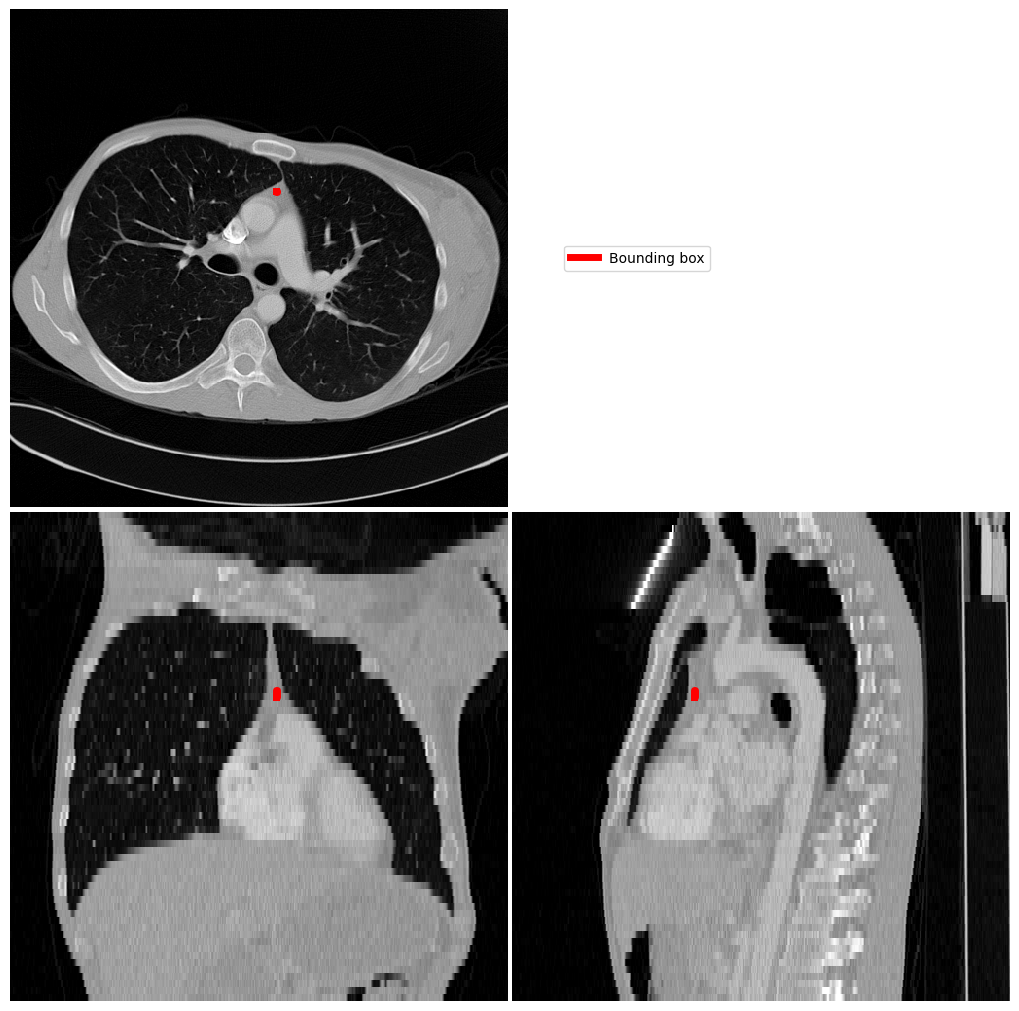

In [3]:
visualize_seed_point(df.iloc[0])

In [14]:
feature_df = get_features("csv_path", weights_path="pretrained_ckpt", spatial_size=(75, 50, 50))

2023-09-09 12:35:34.077 | INFO     | fmcib.run:get_features:12 - Loading CSV file ...
2023-09-09 12:35:34.091 | INFO     | fmcib.preprocessing:get_dataloader:31 - Building dataloader instance ...
2023-09-09 12:35:34.111 | INFO     | fmcib.models.resnet50:resnet50:13 - Loading pretrained foundation model (Resnet50) on cuda...


Spatial size: (75, 50, 50)


2023-09-09 12:35:40.617 | INFO     | fmcib.run:get_features:18 - Running inference over batches ...
  0%|          | 0/59 [00:00<?, ?it/s]

In [5]:
pipeline = get_linear_classifier(weights_path="pkl_model")
pipeline

Trying to unpickle estimator StandardScaler from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator SelectKBest from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator LabelBinarizer from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator MLPClassifier from version 1.2.1 when using version 1.3.0. This might lead to breaking code or invalid results. U

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=500,
                             score_func=functools.partial(<function mutual_info_classif at 0x7f563421ae50>, random_state=42))),
                ('balancer', None),
                ('model',
                 MLPClassifier(alpha=17.06126294753823, hidden_layer_sizes=[30],
                               learning_rate='adaptive', max_iter=1000,
                               random_state=42, solver='lbfgs'))])

<Axes: >

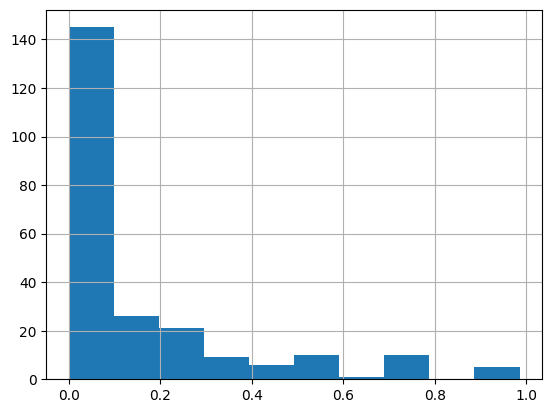

In [6]:
X = feature_df.copy().filter([f"pred_{i}" for i in range(0, 4096)])
feature_df["conf_score"] = pipeline.predict_proba(X)[:, 1]
feature_df["conf_score"].hist()